In [66]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from arch.unitroot import ADF 
from statsmodels.tsa.statespace.tools import diff
from pmdarima.arima.utils import ndiffs
import pmdarima as pm
from statsmodels.stats.diagnostic import acorr_ljungbox

In [67]:
# Q1: Import 'USA Firm Sales' DATA
usadata = pd.read_csv("USA FIRM SALES DATA.csv")
usadata.head()

,Year,Month,BU1,BU2,BU3
0,2015,February,125.1,115.5,113.8
1,2015,March,123.6,115.7,113.8
2,2015,April,123.1,116.5,114.0
3,2015,May,123.1,117.7,114.1
4,2015,June,123.4,118.3,114.7


# Q2: Create Time Series objects of the data
# Q3: Check Stationarity for each of the three series

# BU1

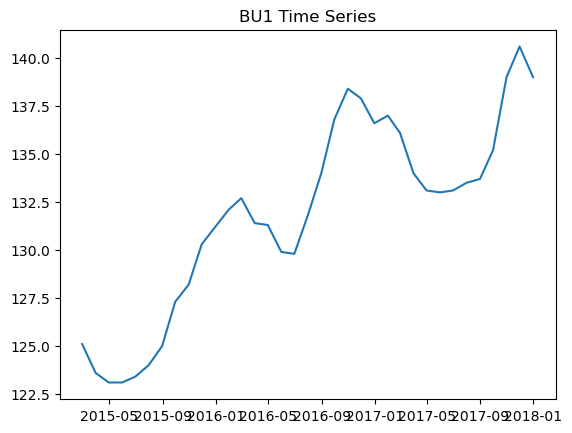

In [68]:
# BU1 Time Series
rng = pd.date_range('2015-02', '2018-01', freq = 'M')
s1 = usadata['BU1'].values[:36]
bu1series = pd.Series(s1, rng)

plt.plot(bu1series)
plt.title('BU1 Time Series')
plt.show()

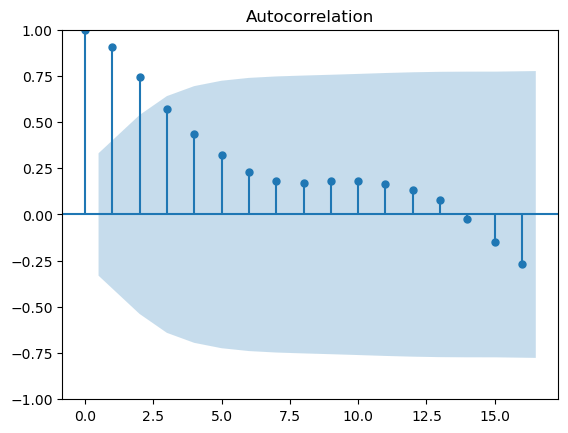

In [69]:
# Check Stationarity for BU1 using ACF plot function
plot_acf(bu1series)
plt.show()

### The ACF plot for BU1 shows slow decay indicating non-stationarity.

In [70]:
# Dickey Fuller Test for BU1
from arch.unitroot import ADF
import warnings

warnings.filterwarnings("ignore")

adf = ADF(bu1series, lags=0, trend='n')
adf.summary() 

# BU1 Time Series is non-Stationary, given DF output of 1.683 > -1.95 (i.e, 5% critical value)

Test Statistic,1.683
P-value,0.978
Lags,0


In [71]:
diffs = ndiffs(bu1series)
print("Number of differences needed:", diffs)

Number of differences needed: 1


In [53]:
from statsmodels.tsa.statespace.tools import diff
warnings.filterwarnings("ignore") 

bu1diff1 = diff(bu1series)
(ADF(bu1diff1,lags=0,trend='n')).summary() 

# Test statistic = -2.963 is less than 5% CV; hence data is stationary with 1st Order Difference

Test Statistic,-2.963
P-value,0.003
Lags,0


In [55]:
# Obtaining Best Model and Parameter Estimation for BU1
import pmdarima as pm
bu1series = pd.to_numeric(bu1series.astype(float))

bu1model = pm.auto_arima(bu1series, max_p=2, max_q=2, max_P=2,max_Q=2, d=1,m=12,
                         seasonal=True, D=1, suppress_warnings=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=78.215, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=76.714, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=74.500, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=73.767, Time=0.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=74.500, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=76.500, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=inf, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=76.954, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=75.364, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 0.790 seconds


In [56]:
bu1model

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [58]:
bu1model.aic()

73.76709547721943

In [59]:
bu1model.params()

ma.L1     0.716660
sigma2    1.350648
dtype: float64

In [60]:
# Checking if Residuals are White Noise using Box-Pierce test
resi_bu1 = pd.Series(bu1model.resid(),rng)

from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(resi_bu1, lags=None, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.002027,0.964091,0.001863,0.965576
2,0.002113,0.998944,0.001939,0.999031
3,0.002650,0.999964,0.002404,0.999969
4,0.002791,0.999999,0.002522,0.999999
5,0.002899,1.000000,0.002609,1.000000
6,0.004379,1.000000,0.003769,1.000000
7,0.017587,1.000000,0.013765,1.000000


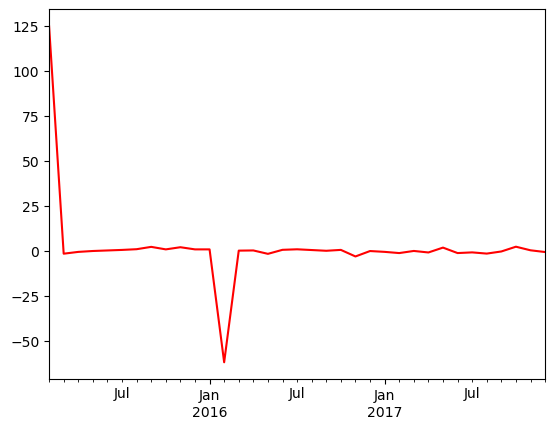

In [61]:
resi_bu1.plot(color='red')
plt.show()

In [62]:
# Predicting sales for BU1 for February 2018, March 2018, April 2018 (i.e., next 3 months forecast)
bu1model.predict(3)

2018-01-31    138.985909
2018-02-28    138.085909
2018-03-31    135.985909
Freq: M, dtype: float64

# BU2

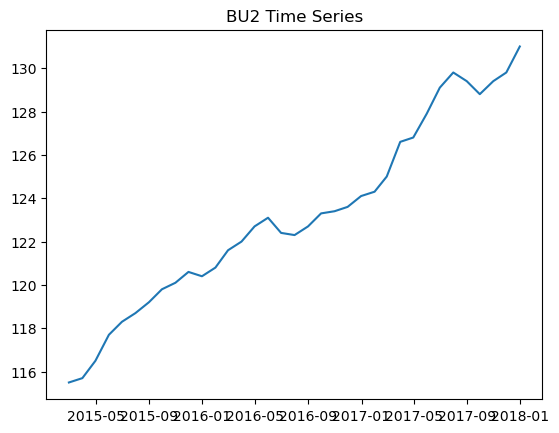

In [91]:
# BU2 Time Series
rng = pd.date_range('2015-02', '2018-01', freq = 'M')
s2 = usadata['BU2'].values[:36]
bu2series = pd.Series(s2, rng)

plt.plot(bu2series)
plt.title('BU2 Time Series')
plt.show()

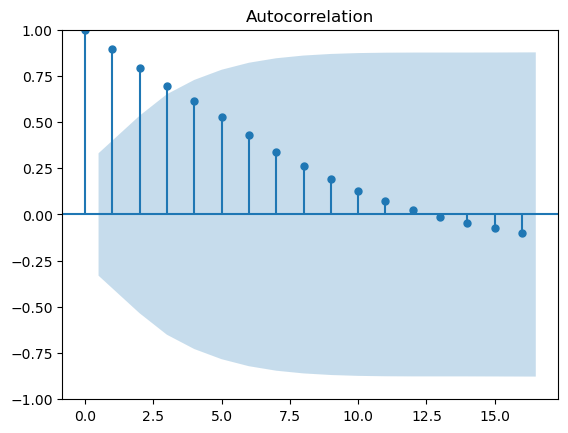

In [92]:
# Check Stationarity for ACF plot for BU2 Time Series
plot_acf(bu2series)
plt.show()

### The ACF plot for BU2 shows slow decay indicating non-stationarity

In [93]:
# Dickey Fuller Test for BU2
from arch.unitroot import ADF
import warnings
warnings.filterwarnings("ignore")

adf = ADF(bu2series, lags=0, trend='n')
adf.summary() 

# BU2 Time Series is non-Stationary, given DF output of 5.295 > -1.95 (i.e, 5% critical value)

Test Statistic,5.295
P-value,1.000
Lags,0


In [94]:
diffs = ndiffs(bu2series)
print("Number of differences needed:", diffs)

Number of differences needed: 1


In [95]:
from statsmodels.tsa.statespace.tools import diff
warnings.filterwarnings("ignore") 

bu2diff2 = diff(bu2series)
(ADF(bu2diff2,lags=0,trend='n')).summary() 

# Test statistic = -2.578 is less than 5% CV; hence data is stationary with 1st Order Difference

Test Statistic,-2.578
P-value,0.010
Lags,0


In [96]:
# Obtaining Best Model and Parameter Estimation for BU2
import pmdarima as pm
bu2series = pd.to_numeric(bu2series.astype(float))

bu2model = pm.auto_arima(bu2series, max_p=2, max_q=2, max_P=2,max_Q=2, d=1,m=12,
                         seasonal=True, D=1, suppress_warnings=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=52.172, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=53.311, Time=0.89 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=52.649, Time=0.12 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=52.059, Time=0.09 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=54.059, Time=0.11 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=54.059, Time=0.08 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=52.059, Time=0.09 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=54.059, Time=0.13 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=56.059, Time=0.16 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=53.313, Time=0.12 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=53.938, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 3.256 seconds


In [97]:
bu2model

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [98]:
bu2model.aic()

52.05866950430929

In [99]:
bu2model.params()

ma.S.L12   -0.512522
sigma2      0.447175
dtype: float64

In [100]:
# Checking if Residuals are White Noise using Box-Pierce test
resi_bu2 = pd.Series(bu2model.resid(),rng)

from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(resi_bu2, lags=None, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.001046,0.974198,0.000961,0.975266
2,0.006829,0.996591,0.006119,0.996945
3,0.015826,0.999473,0.013900,0.999566
4,0.022814,0.999935,0.019755,0.999952
5,0.025249,0.999995,0.021729,0.999996
6,0.027462,1.000000,0.023464,1.000000
7,0.030221,1.000000,0.025551,1.000000


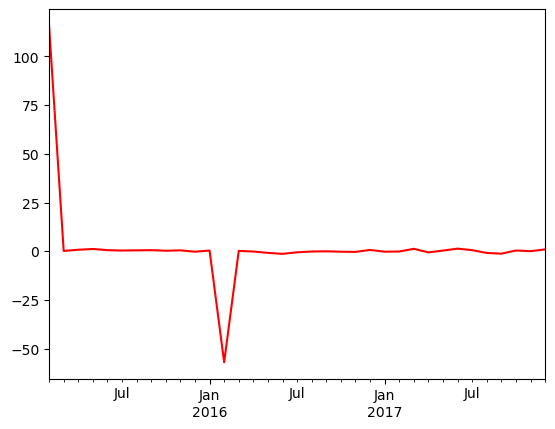

In [101]:
resi_bu2.plot(color='red')
plt.show()

In [102]:
# Predicting sales for BU2 for February 2018, March 2018, April 2018 (i.e., next 3 months forecast)
bu2model.predict(3)

2018-01-31    131.281180
2018-02-28    132.021781
2018-03-31    132.999171
Freq: M, dtype: float64

# BU3

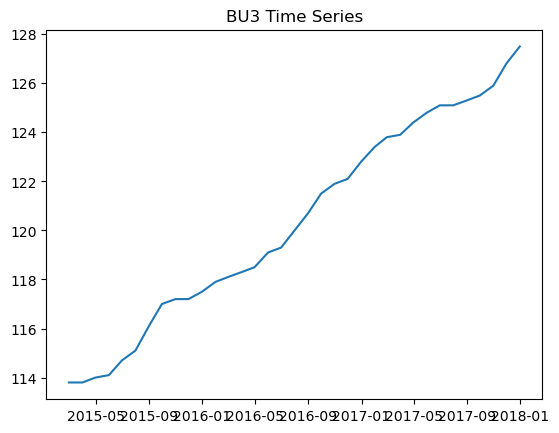

In [103]:
# BU3 Time Series
rng = pd.date_range('2015-02', '2018-01', freq = 'M')
s3 = usadata['BU3'].values[:36]
bu3series = pd.Series(s3, rng)

plt.plot(bu3series) 
plt.title('BU3 Time Series')
plt.show()

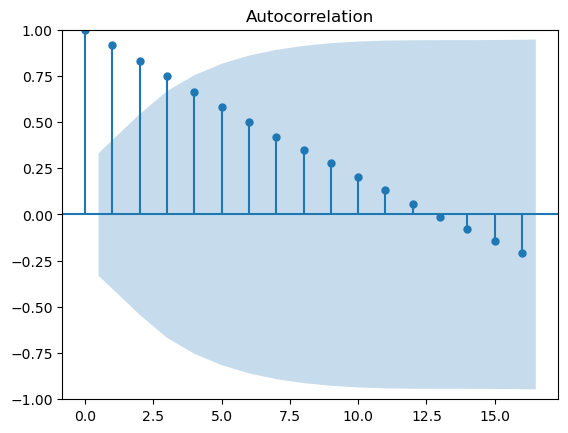

In [104]:
# Check Stationarity for ACF plot for BU3 Time Series
plot_acf(bu3series)
plt.show()

### The ACF plot for BU3 shows slow decay indicating non-stationarity

In [105]:
# Dickey Fuller Test for BU3
from arch.unitroot import ADF
import warnings
warnings.filterwarnings("ignore")

adf = ADF(bu3series, lags=0, trend='n')
adf.summary() 

# BU3 Time Series is non-Stationary, given DF output of 8.486 > -1.95 (i.e, 5% critical value)

Test Statistic,8.486
P-value,1.000
Lags,0


In [106]:
diffs = ndiffs(bu3series)
print("Number of differences needed:", diffs)

Number of differences needed: 1


In [107]:
from statsmodels.tsa.statespace.tools import diff
warnings.filterwarnings("ignore") 

bu3diff3 = diff(bu3series)
bu3diff3_2 = diff(bu3diff3)

(ADF(bu3diff3_2,lags=0,trend='n')).summary() 

# Test statistic = -7.121 is less than 5% Critical Value; hence data is stationary with 2nd Order Difference

Test Statistic,-7.121
P-value,0.000
Lags,0


In [109]:
# Obtaining Best Model and Parameter Estimation for BU3
import pmdarima as pm
bu3series = pd.to_numeric(bu3series.astype(float))

bu3model = pm.auto_arima(bu3series, max_p=2, max_q=2, max_P=2,max_Q=2, d=1,m=12,
                         seasonal=True, D=1, suppress_warnings=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=18.282, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=21.816, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=22.009, Time=0.13 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=20.280, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=20.280, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=22.280, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=20.034, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=20.115, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=20.223, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.691 seconds


In [110]:
bu3model

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [111]:
bu3model.aic()

18.281900494611833

In [112]:
bu3model.params()

sigma2    0.122725
dtype: float64

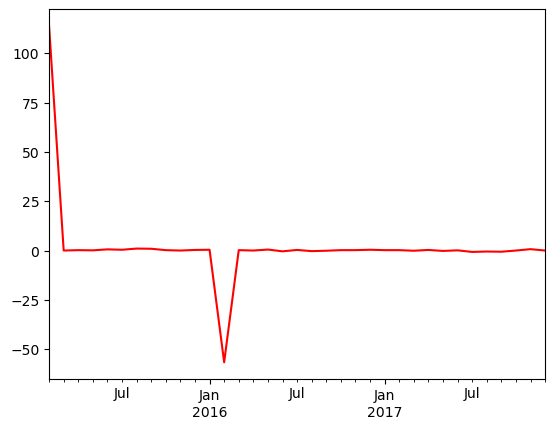

In [114]:
resi_bu3.plot(color='red')
plt.show()

In [115]:
# Predicting sales for BU3 for February 2018, March 2018, April 2018 (i.e., next 3 months forecast)
bu3model.predict(3)

2018-01-31    128.1
2018-02-28    128.5
2018-03-31    128.6
Freq: M, dtype: float64

In [121]:
# Creating a dictionary with forecasted data
forecast_data = {
    'Year': [2019, 2019, 2019],
    'Month': ['February', 'March', 'April'],
    'BU1': [138.985909, 138.085909, 135.985909],  # Forecasted values for BU1
    'BU2': [131.281180, 132.021781, 132.999171],  # Forecasted values for BU2
    'BU3': [128.1, 128.5, 128.6]  # Forecasted values for BU3
}

# Create a DataFrame from the dictionary
forecast_df = pd.DataFrame(forecast_data)

# Display the DataFrame
print(forecast_df)


   Year     Month         BU1         BU2    BU3
0  2019  February  138.985909  131.281180  128.1
1  2019     March  138.085909  132.021781  128.5
2  2019     April  135.985909  132.999171  128.6
